<a href="https://colab.research.google.com/github/muhammadakbarazmi/PCVK_Genap_2022/blob/main/tubes_pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS KELOMPOK PCVK 

MENDETEKSI PARKIR MOBIL DENGAN BEBERAPA METODE PEMBELAJARAN

Disusun Oleh :
1. Muhammad Akbar Azmi
2. Zalna Hanifa 



METODE PEMBELAJARAN YANG DIGUNAKAN :     
1. Metode Grayscale
2. Metode Edge Detection (Deteksi Garis)
3. Metode Object Detection
4. Metode Thresholding

1. IMPORT LIBRARY

In [1]:
#Akses Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. METODE GRAYSCALE

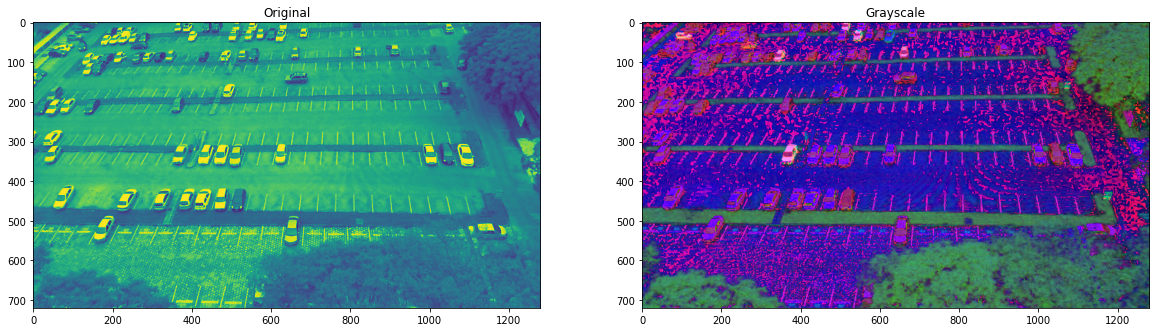

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2hsv

rgb_img = io.imread('/content/drive/MyDrive/ProyekAkhir/CarPark/2012-10-26_07_19_27.jpg')



hsv_hsv = rgb2hsv(rgb_img)
hue_img = hsv_hsv[:,:, 2]

fig, ([ax0, ax1]) = plt.subplots(1,2, figsize=(20, 20))

ax0.imshow(hue_img)
ax0.set_title("Original")
ax1.imshow(hsv_hsv)
ax1.set_title("Grayscale")

plt.show()

3. METODE EDGE DETECTION

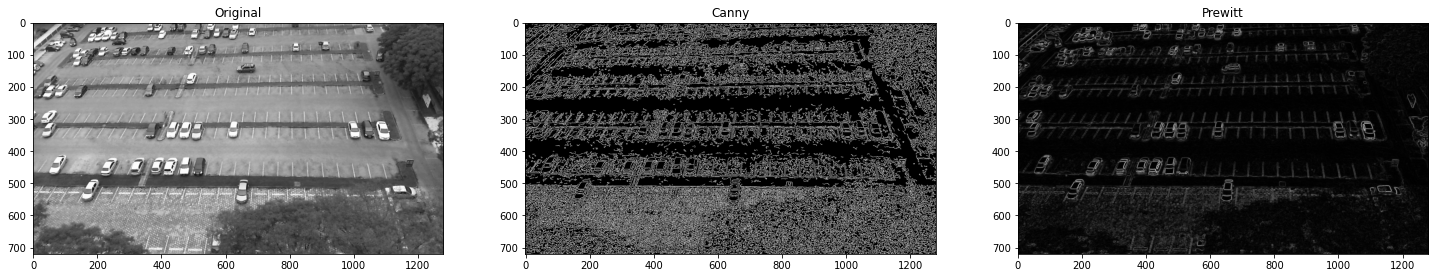

In [21]:
from skimage import data, filters, io
import matplotlib.pyplot as plt
import cv2

img = io.imread('/content/drive/MyDrive/ProyekAkhir/CarPark/2012-10-26_07_19_27.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgC = cv2.Canny(img,20,40)

imgR = filters.roberts(img)
imgP = filters.prewitt(img)
flg, ax = plt.subplots(1,3, figsize=(25,23))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(imgC, cmap='gray')
ax[2].imshow(imgP, cmap='gray')

ax[0].set_title("Original")
ax[1].set_title("Canny")
ax[2].set_title("Prewitt")

plt.show()

4. OBJECT DETECTION

--2022-06-27 15:24:45--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  40.6MB/s    in 6.0s    

2022-06-27 15:24:51 (39.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2022-06-27 15:24:51--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      


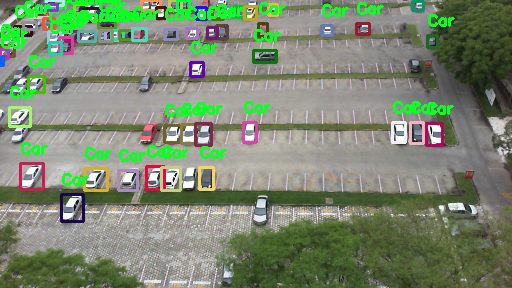

In [16]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

!wget "https://pjreddie.com/media/files/yolov3.weights"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Loading image
img = cv2.imread('/content/drive/MyDrive/ProyekAkhir/CarPark/2012-10-26_07_19_27.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (1280, 1280), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

        # Memberikan penjelasan yaitu tag "Car" kepada setiap objek yang berhasil dipindai
        cv2.putText(img, 'Car', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

CONTOH LAIN :

--2022-06-27 15:25:47--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  36.6MB/s    in 6.8s    

2022-06-27 15:25:54 (34.6 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2022-06-27 15:25:54--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0s 

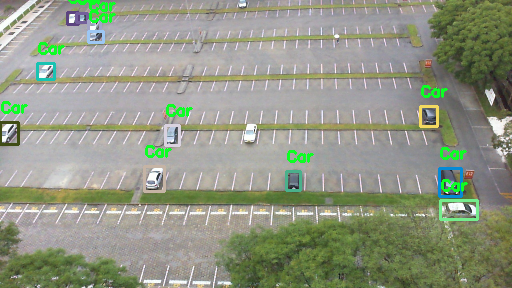

In [17]:
# Load Yolo
!wget "https://pjreddie.com/media/files/yolov3.weights"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Loading image
img = cv2.imread('/content/drive/MyDrive/ProyekAkhir/CarPark/2012-11-09_06_56_32.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 1/255, (1280, 640), (0, 0, 0), swapRB=True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[4:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, 'Car', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

5. METODE THRESHOLDING

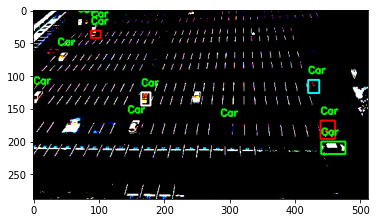

In [18]:
ret, img_binary = cv2.threshold(img,200,255, cv2.THRESH_BINARY)
plt.imshow(img_binary)
plt.show()